In [116]:
from time import sleep
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [117]:
import pandas as pd

In [118]:
df=pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-table-data.csv")
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,113467303,1453.533019,2653924,33.997161,384956,2520550,32.28862,63370,0.811779,8230,NaN
1,United States of America,Americas,28174978,8512.010000,472904,142.870000,72812,506760,153.10000,14866,4.490000,2106,Community transmission
2,India,South-East Asia,11096731,804.110000,105080,7.610000,16752,157051,11.38000,749,0.050000,113,Clusters of cases
3,Brazil,Americas,10455630,4918.920000,373954,175.930000,65169,252835,118.95000,8070,3.800000,1337,Community transmission
4,Russian Federation,Europe,4246079,2909.580000,81353,55.750000,11359,86122,59.01000,2829,1.940000,379,Clusters of cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases


In [119]:
df=df.drop(['WHO Region','Cases - cumulative total per 100000 population','Cases - newly reported in last 7 days','Cases - newly reported in last 7 days per 100000 population','Deaths - cumulative total per 100000 population','Deaths - newly reported in last 7 days','Deaths - newly reported in last 7 days per 100000 population','Transmission Classification'],axis=1)
df

,Name,Cases - cumulative total,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 24 hours
0,Global,113467303,384956,2520550,8230
1,United States of America,28174978,72812,506760,2106
2,India,11096731,16752,157051,113
3,Brazil,10455630,65169,252835,1337
4,Russian Federation,4246079,11359,86122,379
...,...,...,...,...,...
233,Saint Helena,0,0,0,0
234,Tokelau,0,0,0,0
235,Tonga,0,0,0,0
236,Turkmenistan,0,0,0,0


In [120]:
df=df.set_index('Name')
df

,Cases - cumulative total,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 24 hours
Name,,,,
Global,113467303,384956,2520550,8230
United States of America,28174978,72812,506760,2106
India,11096731,16752,157051,113
Brazil,10455630,65169,252835,1337
Russian Federation,4246079,11359,86122,379
...,...,...,...,...
Saint Helena,0,0,0,0
Tokelau,0,0,0,0
Tonga,0,0,0,0


In [121]:
df['Recovered']=df['Cases - cumulative total']-df['Deaths - cumulative total']

In [122]:
df=df.drop(['Cases - cumulative total','Deaths - newly reported in last 24 hours'],axis=1)
df

,Cases - newly reported in last 24 hours,Deaths - cumulative total,Recovered
Name,,,
Global,384956,2520550,110946753
United States of America,72812,506760,27668218
India,16752,157051,10939680
Brazil,65169,252835,10202795
Russian Federation,11359,86122,4159957
...,...,...,...
Saint Helena,0,0,0
Tokelau,0,0,0
Tonga,0,0,0


In [123]:
#df=df.drop('Global')

In [133]:
inp=input("Enter Country : ")

Enter Country : Brazil


In [134]:
df.loc[[inp]]

,Cases - newly reported in last 24 hours,Deaths - cumulative total,Recovered
Name,,,
Brazil,65169,252835,10202795


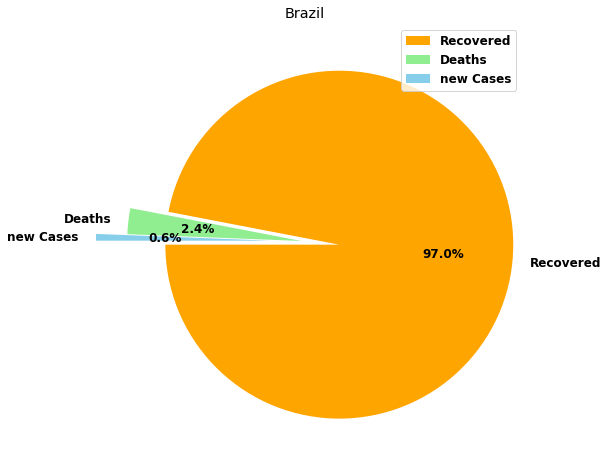

In [135]:
import matplotlib.pyplot as plt
recovered=df.at[inp,'Recovered']
Deaths=df.at[inp,'Deaths - cumulative total']
new=df.at[inp,'Cases - newly reported in last 24 hours']
f=plt.figure(figsize=(8,8)) 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams.update({'text.color' : "black",'axes.labelcolor' : "black"})
plt.pie([recovered,Deaths,new],labels=['Recovered','Deaths','new Cases'],colors = ['orange','lightgreen','skyblue'],explode=(0.2,0.02,0.2),startangle = 180,autopct = '%1.1f%%')
#DISPLAYING THE PLOT
plt.title(inp)
plt.legend()
plt.show()